“学习”是指从训练数据中自动获取最优权重参数的过程

## 训练数据和测试数据

机器学习中，一般将数据分为训练数据和测试数据两部分来进行学习和实验等。首先，使用训练数据进行学习，寻找最优的参数；然后，使用测试数据评价训练得到的模型的实际能力。

## 损失函数

神经网络以某个指标为线索寻找最优权重参数。神经网络的学习中所用的指标称为损失函数（loss function）。这个损失函数可以使用任意函数，但一般用均方误差和交叉熵误差等。

### 均方误差 mean squared error

$$E=\frac{1}{2} \sum_{k}\left(y_{k}-t_{k}\right)^{2}$$

这里，$y_{k}$ 表示神经网络的输出，$t_{k}$ 表示监督数据，$k$ 表示数据的维数

In [1]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

上面数字识别的例子中，$y_{k}$ 、$t_{k}$ 如下：（数字为2）

In [5]:
# 设 "2" 为正确解, y为神经网络输出值，显示“2”的概率最大
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003


In [6]:
# 神经网络输出值显示 “7”的概率最高
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.5975


可以看出输出为“2”的损失函数值更小

### 交叉熵误差 cross entropy error

$$E=-\sum_{k} t_{k} \log y_{k}$$

这种损失函数只计算对应正确解标签的输出的自然对数。（$t_{k}$ 中只有正确解标签的索引为1，其他均为0（**one-hot 表示**）。

比如，假设正确解标签的索引是“2”，与之对应的神经网络的输出是0.6，则交叉熵误差
是−log 0.6 = 0.51；若“2”对应的输出是0.1，则交叉熵误差为−log 0.1 = 2.30。

In [7]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [8]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 神经网络输出“2”
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

# 神经网络输出“7”
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


可以看出输出为“2”的损失函数值更小

### mini-batch学习

上面说的计算损失函数的方法都是针对单个数据的，下面需要计算所有训练数据的损失函数的和：

$$E=-\frac{1}{N} \sum_{n} \sum_{k} t_{n k} \log y_{n k}$$

In [9]:
def cross_entropy_error(y, t):
    delta = 1e-7
    if y.ndim == 1: # 针对一个数据
        y = y.reshape(1, y.size)
        t = t.reshape(1, t.size)
    
    batch_size = y[0]
    return -np.sum(t * np.log(y + delta)) / batch_size

## 微分

### 导数

导数就是表示某个瞬间的变化量。它可以定义成下面的式子：

$$\frac{\mathrm{d} f(x)}{\mathrm{d} x}=\lim _{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}$$

看导数的定义，用函数很好实现，只需要取h为一个很小的值就可以了，但是如果用计算机来实现的话，会有两个问题：

1. 计算机的舍入误差
2. 由于h不可能无限接近与0， 所以真的导数（真的切线）和上述实现中得到的导数的值在严格意义上并不一致

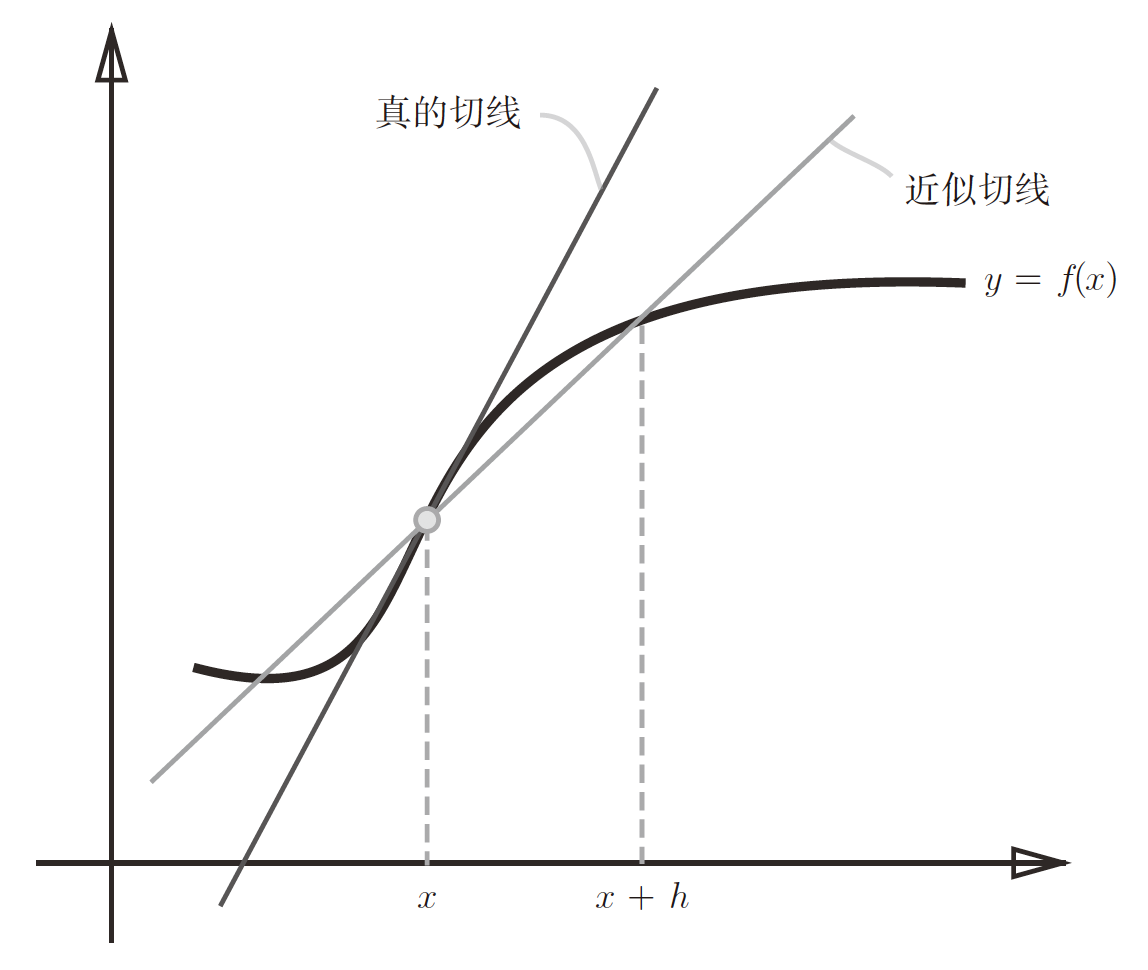

为了减小数值微分的误差，可以计算函数 $f$ 在 $(x+h)$ 和 $(x-h)$ 之间的查分。

In [10]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

下面试着求个导，求下面这个二次函数分别在点 $x=5$ 和 $x=10$ 两个点的导数

$$y=0.01 x^{2}+0.1 x$$

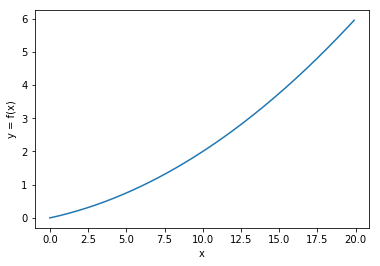

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def function_1(x):
    return 0.01 * x**2 + 0.1 * x

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.plot(x, y)
plt.show()

In [14]:
# x=5
print(numerical_diff(function_1, 5))
# x=10
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


根据导数的解析式，$\frac{\mathrm{d} f(x)}{\mathrm{d} x}=0.02 x+0.1$，在 $x=5$ 和 $x=10$ 处，真的导数分别为0.2和0.3

In [15]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

### 偏导数

下面的函数是一个有两个变量的函数：$$f\left(x_{0}, x_{1}\right)=x_{0}^{2}+x_{1}^{2}$$

In [16]:
def function_2(x):
    # np.sum(x**2)
    return x[0]**2 + x[1]**2

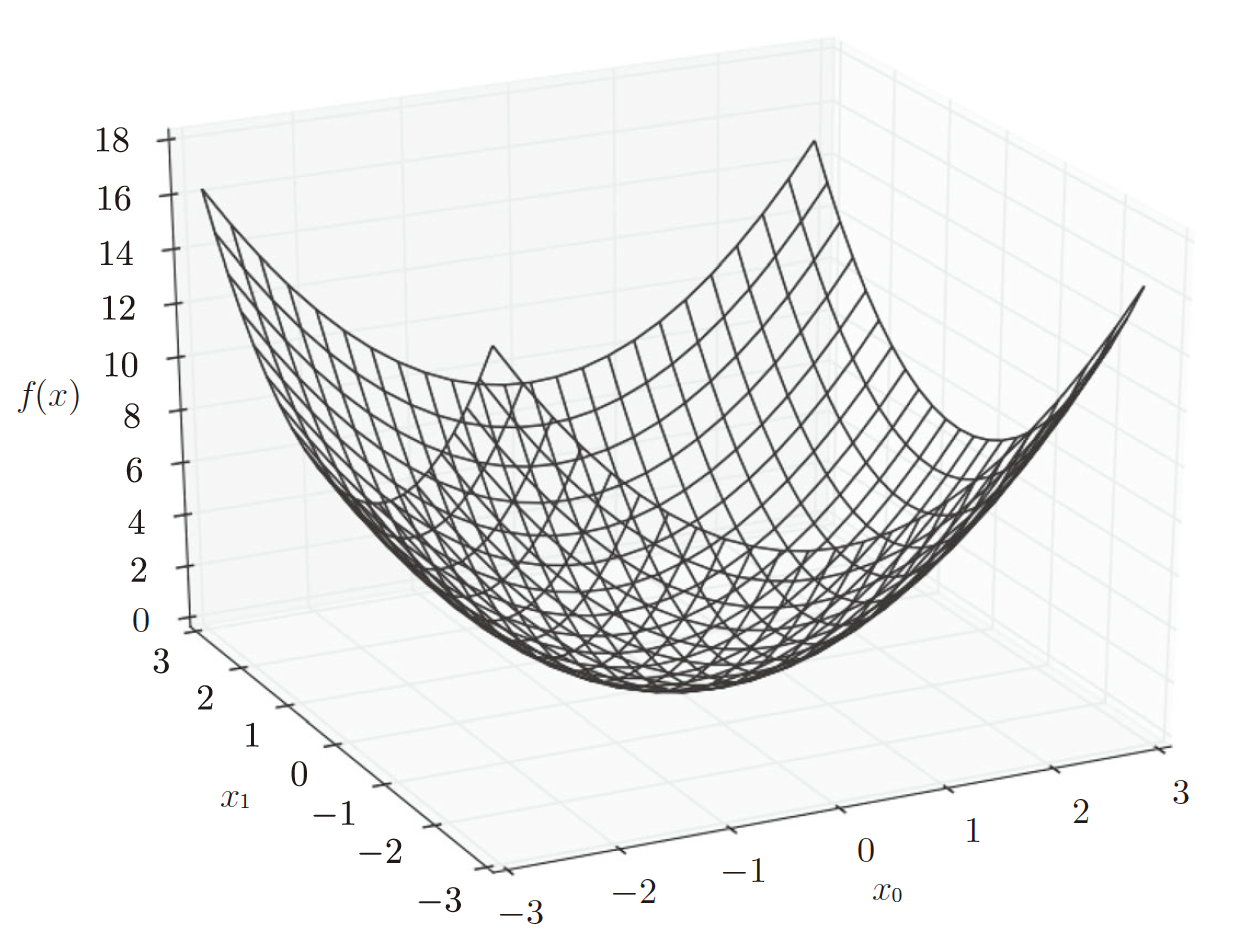

式子中有两个变量，求这种有多个变量的导数叫做**偏导数**，写成 $\frac{\partial f}{\partial x_{0}}$、$\frac{\partial f}{\partial x_{1}}$

#### 求$x_{0}=3$，$x_{1}=4$时， 关于$x_{0}$的偏导数 $\frac{\partial f}{\partial x_{0}}$

In [17]:
def function_tmp1(x0):
    return x0*x0 + 4.0 ** 2

numerical_diff(function_tmp1, 3.0)

6.00000000000378

#### 求$x_{0}=3$，$x_{1}=4$时， 关于$x_{1}$的偏导数 $\frac{\partial f}{\partial x_{1}}$

In [18]:
def function_tmp2(x1):
    return 3.0 ** 2 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

**总结：** 偏导数需要将多个变量中的某一个变量定为目标变量，并将其他变量固定为某个值

### 梯度

像 $\left(\frac{\partial f}{\partial x_{0}}, \frac{\partial f}{\partial x_{1}}\right)$ 这样由全部变量的偏导数汇总而成的向量称为**梯度(gradient)**

In [19]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # 生成和x形状相同的数组
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 还原值
    
    return grad

In [20]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

可以看出和上面数学方法算出的梯度值一样

No handles with labels found to put in legend.


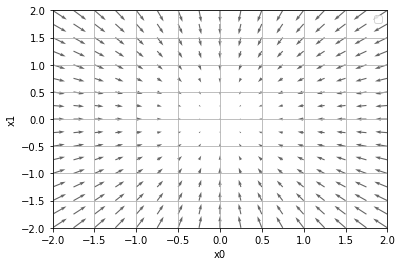

In [22]:
# 求全部点的梯度值
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)
    
X = X.flatten()
Y = Y.flatten()
    
grad = numerical_gradient(function_2, np.array([X, Y]) )
    
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

**梯度指示的方向是各点处的函数值减小最多的方向**

## 梯度下降法 gradient descent method

在梯度法中，函数的取值从当前位置沿着梯度方向前进一定距离，然后在新的地方重新求梯度，再沿着新梯度方向前进，如此反复，不断地沿梯度方向前进。像这样，通过不断地沿梯度方向前进，逐渐减小函数值的过程就是梯度法（gradient method）。梯度法是解决机器学习中最优化问题的常用方法。

下面式子表示更新一次 $$\begin{aligned} x_{0} &=x_{0}-\eta \frac{\partial f}{\partial x_{0}} \\ x_{1} &=x_{1}-\eta \frac{\partial f}{\partial x_{1}} \end{aligned}$$

$\eta$ 称作学习率(learning rate)，上面的更新步骤会反复执行。也就是说，每一步都按上面式子更新变量的值，通过反复执行此步骤，逐渐减小函数值

In [23]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

### 使用梯度下降法求 $f\left(x_{0}+x_{1}\right)=x_{0}^{2}+x_{1}^{2}$ 的最小值

In [25]:
def function_2(x):
    return np.sum(x**2)

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=0.1)

array([-6.11110793e-10,  8.14814391e-10])

结果接近（0, 0）

### 如何选择学习率

学习率过大的话，会发散成一个很大的值；反过来，学习率过小的话，基本上没怎么更新就结束了

像学习率这种参数称为**超参数**

## 神经网络的梯度

神经网络的学习也要求梯度。这里所说的梯度是指损失函数关于权重参数的梯度。比如，有一个只有一个形状为2 × 3 的权重 $\boldsymbol{W}$ 的神经网络，损失函数用 $L$ 表示，梯度 $\frac{\partial L}{\partial \boldsymbol{W}}$ 为： $$
\boldsymbol{W}=\left( \begin{array}{ccc}{w_{11}} & {w_{12}} & {w_{13}} \\ {w_{21}} & {w_{22}} & {w_{23}}\end{array}\right)
$$ $$
\frac{\partial L}{\partial \boldsymbol{W}}=\left( \begin{array}{ccc}{\frac{\partial L}{\partial w_{11}}} & {\frac{\partial L}{\partial w_{12}}} & {\frac{\partial L}{\partial w_{13}}} \\ {\frac{\partial L}{\partial w_{21}}} & {\frac{\partial L}{\partial w_{22}}} & {\frac{\partial L}{\partial w_{23}}}\end{array}\right)
$$

这个梯度的含义可以解释为，比如第一行第一列的元素 $\frac{\partial L}{\partial w_{11}}$ ，表示当 $w_{11}$ 稍微变化时，损失函数 $L$ 会发生多大变化。

**note: ** 梯度的形状和权重 $W$ 相同

In [34]:
# 
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y


def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [28]:
import numpy as np

# 求一个点的梯度
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

In [29]:
class simpleNet:
    def __init__(self):
        # 2X3的权重参数
        self.W = np.random.randn(2, 3) #用高斯分布来随机生成初始权重
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        
        return cross_entropy_error(y, t)

net = simpleNet()
print(net.W)

[[-1.22802691  0.36255654 -1.17443012]
 [ 0.52513325  0.99120925 -1.67271719]]


In [30]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

p = net.predict(x)
print(p)

[-0.26419622  1.10962225 -2.21010354]


In [31]:
np.argmax(p) #最大值的索引

1

In [32]:
# print loss
net.loss(x, t)

3.5738226361660903

In [33]:
# 求梯度
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.11780223  0.46536669 -0.58316892]
 [ 0.17670335  0.69805004 -0.87475338]]


求出梯度之后，接下来根据梯度下降算法，更新权重参数即可

## 神经网络的学习步骤

神经网络存在合适的权重和偏置，调整权重和偏置以便拟合训练数据的过程称为“学习“

1. mini-batch
    从训练数据中随机选出一部分数据，这部分数据称为mini-batch。我们的目标是减小mini-batch 的损失函数的值。

2. 计算梯度
    为了减小mini-batch 的损失函数的值，需要求出各个权重参数的梯度。梯度表示损失函数的值减小最多的方向。

3. 更新参数
    将权重参数沿梯度方向进行微小更新

4. 重复步骤1、2、3

**note: ** 这里使用的数据是随机选择的mini batch 数据，所以又称为随机梯度下降法（stochastic gradient descent）

## 实例

In [41]:
class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重参数
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y

    # x: 输入数据 t: 监督数据
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

### 基于mini-batch的实现

In [1]:
import numpy as np
from dataset.mnist import load_mnist
from TwoLayerNet import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 超参数
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 获取mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
    grad = network.numerical_gradient(x_batch, t_batch)
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 记录学习过程
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train acc, test acc | 0.11556666666666666, 0.1168


KeyboardInterrupt: 